# Network vis for news source propagation on Reddit

Use gephi instead! networkx for 1 cluster

In [1]:
!pip install networkx

In [250]:
import networkx as nx
import json
import pandas as pd
import math

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from collections import defaultdict

**A look into `networkx`**

In [131]:
dir(nx)

['AmbiguousSolution',
 'DiGraph',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'OrderedDiGraph',
 'OrderedGraph',
 'OrderedMultiDiGraph',
 'OrderedMultiGraph',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adj_matrix',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 'algebraicconnectivity',
 '

In [183]:
help(nx.layout)

Help on module networkx.drawing.layout in networkx.drawing:

NAME
    networkx.drawing.layout

DESCRIPTION
    ******
    Layout
    ******
    
    Node positioning algorithms for graph drawing.
    
    For `random_layout()` the possible resulting shape
    is a square of side [0, scale] (default: [0, 1])
    Changing `center` shifts the layout by that amount.
    
    For the other layout routines, the extent is
    [center - scale, center + scale] (default: [-1, 1]).
    

FUNCTIONS
    bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)
        Position nodes in two straight lines.
        
        Parameters
        ----------
        G : NetworkX graph or list of nodes
            A position will be assigned to every node in G.
        
        nodes : list or container
            Nodes in one node set of the bipartite graph.
            This set will be placed on left or top.
        
        align : string (default='vertical')
 

In [132]:
help(nx.draw_networkx_edges)

Help on function draw_networkx_edges in module networkx.drawing.nx_pylab:

draw_networkx_edges(G, pos, edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=None, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    Draw the edges of the graph G.
    
    This draws only the edges of the graph G.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.
    
    edgelist : collection of edge tuples (default=G.edges())
        Draw only specified edges
    
    width : float or array of floats (default=1.0)
        Line width of edges
    
    edge_color : color or array of colors (default='k')
        Edge color. Can be a single color or a sequence

u: a, v: b, w: {'weight': 0.6}
u: a, v: c, w: {'weight': 0.2}
u: a, v: d, w: {'weight': 0.3}
u: c, v: d, w: {'weight': 0.1}
u: c, v: e, w: {'weight': 0.7}
u: c, v: f, w: {'weight': 0.9}


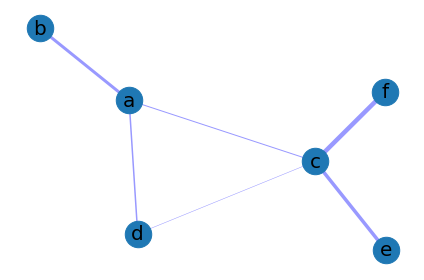

In [251]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
for u,v,w in G.edges(data=True):
    print(f"u: {u}, v: {v}, w: {w}")
    nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], 
                           width=w['weight']*5, alpha=0.4, edge_color="b")

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [134]:
G.edges(data=True)

EdgeDataView([('a', 'b', {'weight': 0.6}), ('a', 'c', {'weight': 0.2}), ('a', 'd', {'weight': 0.3}), ('c', 'd', {'weight': 0.1}), ('c', 'e', {'weight': 0.7}), ('c', 'f', {'weight': 0.9})])

## Building graph from our own data

In [252]:
with open("ns_subreddit_2021-03.json") as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open("ns_subreddit_2021-04.json") as infile4:
    ns_subreddit_04 = json.load(infile4)

To add edges, then maybe we should look into individual edges.

In [253]:
with open("subreddit_ns_2021-03.json") as infile3a:
    subreddit_ns_03 = json.load(infile3a)
    
with open("subreddit_ns_2021-04.json") as infile4a:
    subreddit_ns_04 = json.load(infile4a)

In [254]:
G = nx.Graph()

In [255]:
print(G.nodes()) # returns a list
print(G.edges()) # returns a list

[]
[]


**let's just use 1000 subreddits with the most subscribers**

In [373]:
news_sources = list(set(ns_subreddit_03.keys()) & set(ns_subreddit_04.keys()))
len(news_sources)

3277

In [297]:
subreddits = list(set(subreddit_ns_03.keys()) & set(subreddit_ns_04.keys()))
len(subreddits)

10809

In [298]:
# Let's only use the subreddits that have lots of subscribers
with open ("subreddit_subscribers.json", "r", encoding = "utf-8") as infile:
    subreddit_subscribers = json.load(infile)

In [299]:
subreddits_w_subc = [subreddits[k] for k in range(len(subreddits)) if subreddits[k] in subreddit_subscribers]
len(subreddits_w_subc)

8865

In [300]:
subreddits_w_subc = [s for s in subreddits_w_subc if subreddit_subscribers[s] is not None]
len(subreddits_w_subc)

8863

In [301]:
srs_all = sorted(subreddits_w_subc, key= lambda x: subreddit_subscribers[x], reverse= True)

(array([ 203.,  197.,  535., 1152., 1895., 2204., 1629.,  572.,  202.,
          46.]),
 array([ 0.        ,  1.72514367,  3.45028734,  5.17543102,  6.90057469,
         8.62571836, 10.35086203, 12.0760057 , 13.80114938, 15.52629305,
        17.25143672]),
 <BarContainer object of 10 artists>)

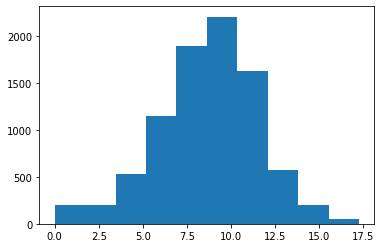

In [302]:
# plt.hist([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s] > 0])
plt.hist([math.log(subreddit_subscribers[s]) for s in srs_all if subreddit_subscribers[s] > 0])

# could log scale for both x and y

In [303]:
# srs_1000 = srs_all[:1000]
# let's try 500
srs_1000 = srs_all[:500]

**Now we prepare to make graph**

To do this, we will make a dictionary, where the keys will be news source pairings (tuple), and the values will be the list of subreddits where they co-occur. To ensure no double counting, each key 

**1. Edges**

In [304]:
subreddit_files = [subreddit_ns_03, subreddit_ns_04]

In [305]:
co_occurences = defaultdict(int)
node_sizes = defaultdict(int)

for subreddit_file in subreddit_files:
    for s in subreddit_file:
        # we will only process for this subreddit if it is one of the 1k subreddits with the most subscribers
        if s not in srs_1000:
            continue
        # each s contains news sources and how many times they appear
        news_sources = list(subreddit_file[s].keys())
        # make pairings
        i = 0
        while i < len(news_sources)-1:
            # record for this particular news source
            node_sizes[news_sources[i]] += 1
            j = i + 1
            while j <= len(news_sources)-1:
                ns_pair = sorted([news_sources[i], news_sources[j]])
                # cast to be tuple
                ns_pair = tuple(ns_pair)
                # the pairing co_occur in this subreddit
                # co_occurences[ns_pair].append(s)
                co_occurences[ns_pair] += 1
                j += 1
            i += 1
        # increment for the last news source
        node_sizes[news_sources[-1]] += 1

**we only consider pairings that co-occur at least 5 times**

In [306]:
co_occurences = {e:w for e,w in list(co_occurences.items()) if w >= 10}

In [307]:
len(co_occurences)

34316

In [219]:
co_occurences

{('buzzfeed.com', 'imdb.com'): 28,
 ('imdb.com', 'time.com'): 26,
 ('imdb.com', 'polygon.com'): 23,
 ('comicbook.com', 'imdb.com'): 30,
 ('deadline.com', 'imdb.com'): 44,
 ('imdb.com', 'nytimes.com'): 56,
 ('anchor.fm', 'imdb.com'): 31,
 ('imdb.com', 'theverge.com'): 38,
 ('imdb.com', 'variety.com'): 42,
 ('buzzfeed.com', 'time.com'): 26,
 ('buzzfeed.com', 'polygon.com'): 20,
 ('buzzfeed.com', 'comicbook.com'): 25,
 ('buzzfeed.com', 'deadline.com'): 37,
 ('buzzfeed.com', 'nytimes.com'): 63,
 ('anchor.fm', 'buzzfeed.com'): 35,
 ('buzzfeed.com', 'theverge.com'): 40,
 ('buzzfeed.com', 'variety.com'): 36,
 ('comicbook.com', 'time.com'): 20,
 ('deadline.com', 'time.com'): 36,
 ('nytimes.com', 'time.com'): 69,
 ('anchor.fm', 'time.com'): 37,
 ('theverge.com', 'time.com'): 55,
 ('time.com', 'variety.com'): 38,
 ('comicbook.com', 'polygon.com'): 34,
 ('deadline.com', 'polygon.com'): 36,
 ('gamesradar.com', 'polygon.com'): 29,
 ('nytimes.com', 'polygon.com'): 38,
 ('anchor.fm', 'polygon.com'): 

**2. Nodes**

For each node, we count in how many subreddits they appear.

In [308]:
G = nx.Graph()
G.add_nodes_from(news_sources)

### Now we try to draw our graph

In [309]:
G = nx.Graph()
for e, w in list(co_occurences.items()):
    u, v = e
    G.add_edge(u, v, weight=w)

In [310]:
'nytimes.com' in G.nodes()

True

In [311]:
len(G.nodes())

590

In [312]:
len_edges = len(G.edges())
len_edges

34316

In [313]:
len(co_occurences)

34316

In [233]:
help(nx.subgraph)

Help on function subgraph in module networkx.classes.function:

subgraph(G, nbunch)
    Returns the subgraph induced on nodes in nbunch.
    
    Parameters
    ----------
    G : graph
       A NetworkX graph
    
    nbunch : list, iterable
       A container of nodes that will be iterated through once (thus
       it should be an iterator or be iterable).  Each element of the
       container should be a valid node type: any hashable type except
       None.  If nbunch is None, return all edges data in the graph.
       Nodes in nbunch that are not in the graph will be (quietly)
       ignored.
    
    Notes
    -----
    subgraph(G) calls G.subgraph()



In [316]:
max(node_sizes.values())

340

In [317]:
edge_weights = [e[2]['weight']*0.07 for e in G.edges(data=True)]

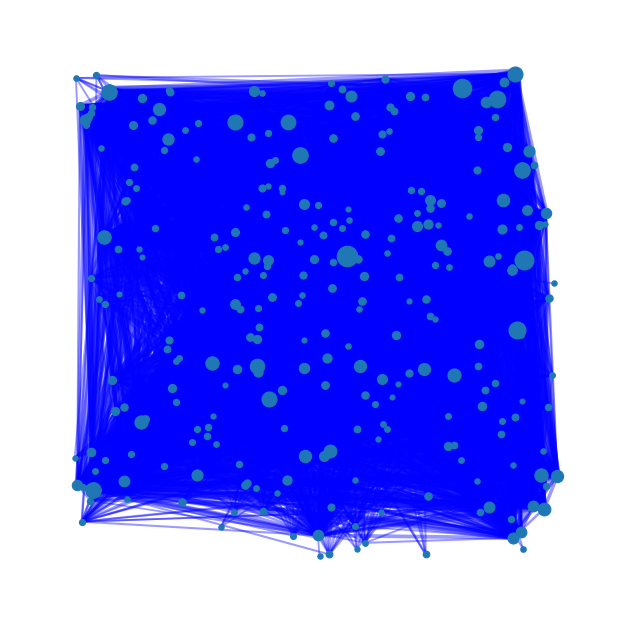

In [237]:
figure(figsize=(8, 8), dpi=80)
pos = nx.random_layout(G) #, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
for nn in G.nodes():
    # print("nn:", nn)
    nx.draw_networkx_nodes(G, pos, nodelist = [nn],
                           node_size=node_sizes[nn])

# edges
# ecount = 0
# for u,v,w in G.edges(data=True):
#     if ecount%100 == 0:
#         print("{}% done".format(ecount*100/len_edges))
nx.draw_networkx_edges(G, pos, 
                       edgelist=G.edges, 
                       # width=w['weight']*5/500,
                       width = edge_weights,
                       alpha=0.4, edge_color="b")
#     ecount += 1

# # labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## Subgraph of G

Let's find 50 news sources most mentioned on reddit.

In [374]:
news_sources_34 = {ns:set(ns_subreddit_03[ns])|set(ns_subreddit_04[ns]) for ns in news_sources}

In [377]:
n34_sr = {ns:len(news_sources_34[ns]) for ns in news_sources_34}

In [384]:
most_posted_ns = sorted(list(n34_sr.items()), key= lambda x:x[1], reverse=True)
most_posted_ns[:10]

[('nytimes.com', 3372),
 ('linkedin.com', 2682),
 ('cnn.com', 2447),
 ('reuters.com', 2307),
 ('washingtonpost.com', 2113),
 ('cnbc.com', 2013),
 ('apnews.com', 1891),
 ('anchor.fm', 1818),
 ('bbc.co.uk', 1808),
 ('nbcnews.com', 1632)]

In [390]:
most_posted_interest = [n[0] for n in most_posted_ns[:100]]
most_posted_interest

['nytimes.com',
 'linkedin.com',
 'cnn.com',
 'reuters.com',
 'washingtonpost.com',
 'cnbc.com',
 'apnews.com',
 'anchor.fm',
 'bbc.co.uk',
 'nbcnews.com',
 'npr.org',
 'independent.co.uk',
 'theverge.com',
 'thehill.com',
 'cbc.ca',
 'newsweek.com',
 'yahoo.com',
 'cbsnews.com',
 'latimes.com',
 'politico.com',
 'foxnews.com',
 'marketwatch.com',
 'deadline.com',
 'abc.net.au',
 'variety.com',
 'buzzfeed.com',
 'aljazeera.com',
 'vox.com',
 'thedailybeast.com',
 'theatlantic.com',
 'cityam.com',
 'axios.com',
 'imdb.com',
 'espn.com',
 'slate.com',
 'hollywoodreporter.com',
 'cnet.com',
 'newyorker.com',
 'techcrunch.com',
 'insider.com',
 'scmp.com',
 'news.com.au',
 'telegraph.co.uk',
 'scientificamerican.com',
 'coindesk.com',
 'time.com',
 'phys.org',
 'pbs.org',
 'gizmodo.com',
 'ign.com',
 'investopedia.com',
 'buzzfeednews.com',
 'comicbook.com',
 'thestar.com',
 'thetimes.co.uk',
 'ctvnews.ca',
 'pcgamer.com',
 'engadget.com',
 'livescience.com',
 'chicagotribune.com',
 'scien

What about based on in how many subreddits the news sources appear in?

In [314]:
sorted_node_sizes = sorted(list(node_sizes.items()), key=lambda x: x[1], reverse= True)

In [320]:
news_sources_of_interest = [n[0] for n in sorted_node_sizes[:50]]

Let's go with the most posted news sources

In [391]:
subG = G.subgraph(most_posted_interest)

In [392]:
len(subG.nodes())

100

In [393]:
len(subG.edges())

4554

In [394]:
d = dict(subG.degree(subG.nodes()))
print([(k,d[k]) for k in d if d[k] < 99])

[('nationalpost.com', 94), ('newrepublic.com', 88), ('comicbook.com', 83), ('barrons.com', 85), ('si.com', 71), ('phys.org', 97), ('economist.com', 97), ('sciencedaily.com', 87), ('inverse.com', 88), ('seattletimes.com', 96), ('smh.com.au', 95), ('foxbusiness.com', 94), ('indianexpress.com', 96), ('tandfonline.com', 60), ('washingtonexaminer.com', 90), ('slate.com', 98), ('scientificamerican.com', 95), ('atlasobscura.com', 65), ('lawandcrime.com', 85), ('thetimes.co.uk', 97), ('theverge.com', 98), ('newyorker.com', 98), ('breitbart.com', 83), ('ctvnews.ca', 97), ('gizmodo.com', 98), ('jacobinmag.com', 96), ('thedailybeast.com', 97), ('time.com', 98), ('kotaku.com', 72), ('politico.com', 98), ('pcgamer.com', 72), ('thestar.com', 93), ('zdnet.com', 77), ('nme.com', 88), ('investopedia.com', 60), ('healthline.com', 68), ('axios.com', 98), ('hollywoodreporter.com', 98), ('bostonglobe.com', 92), ('theatlantic.com', 98), ('mirror.co.uk', 92), ('techcrunch.com', 97), ('dailywire.com', 83), ('

In [413]:
subG_edge_weights = [e[2]['weight'] for e in subG.edges(data=True)]

In [414]:
maxsw = max(subG_edge_weights)
maxsw

196

In [415]:
subG_edge_weights = [e[2]['weight']*2/maxsw for e in subG.edges(data=True)]

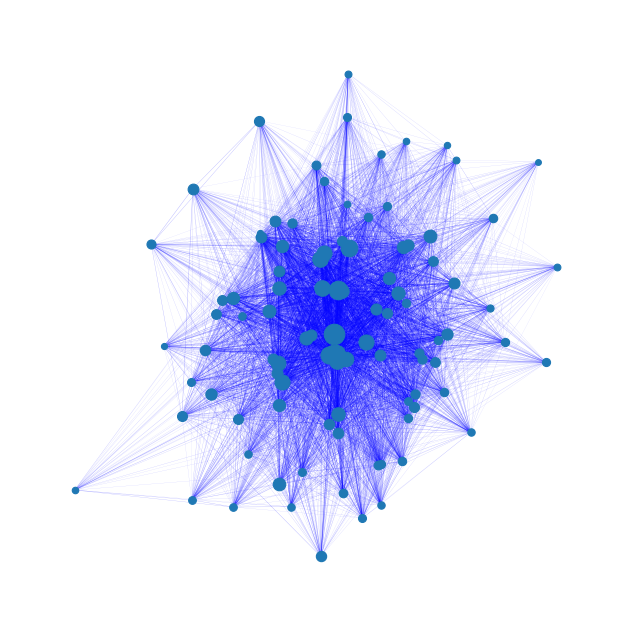

In [416]:
figure(figsize=(8, 8), dpi=80)

pos = nx.spring_layout(subG) #, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
for nn in subG.nodes():
    # print("nn:", nn)
    nx.draw_networkx_nodes(subG, pos, nodelist = [nn],
                           node_size=node_sizes[nn])

nx.draw_networkx_edges(subG, pos, 
                       edgelist=subG.edges, 
                       # width=w['weight']*5/500,
                       width = subG_edge_weights,
                       alpha=0.3, edge_color="b")
#     ecount += 1

# # labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## Let's partition based on PAB scores

In [417]:
with open("biasScoresDict.json", "r", encoding="utf-8") as infile:
    bias_scores_dict = json.load(infile)

In [434]:
len(bias_scores_dict)

19022

In [418]:
bias_scores_dict['nytimes.com']

-0.2602

Let's get 2k most negative news sources and 2k most positive news sources.

In [438]:
bias_sorted = sorted(list(bias_scores_dict.items()), key= lambda x:x[1])
bias_sorted[:5]

[('thefeministwire.com', -1.0),
 ('cassiuslife.com', -1.0),
 ('progressivemind.ucoz.com', -1.0),
 ('reproductiverights.org', -1.0),
 ('moulton.house.gov', -1.0)]

In [477]:
most_neg = [n[0] for n in bias_sorted[:3000]]
most_pos = [n[0] for n in bias_sorted[-3000:]]

In [478]:
incl_most_neg = [n for n in most_neg if n in G.nodes()]
len(incl_most_neg)

51

In [479]:
incl_most_pos = [n for n in most_pos if n in G.nodes()]
len(incl_most_pos)

47

Now let's draw the graph

In [511]:
polG = G.subgraph(incl_most_neg+incl_most_pos)

In [512]:
len(polG.nodes())

98

In [513]:
len(polG.edges())

643

In [514]:
largest_cc = max(nx.connected_components(polG), key=len)

In [515]:
# let's only consider the 1 connected component
polG = polG.subgraph(list(largest_cc))

In [516]:
polG_edge_weights = [e[2]['weight'] for e in polG.edges(data=True)]

(array([469., 100.,  38.,  12.,  14.,   3.,   3.,   1.,   2.,   1.]),
 array([10. , 14.5, 19. , 23.5, 28. , 32.5, 37. , 41.5, 46. , 50.5, 55. ]),
 <BarContainer object of 10 artists>)

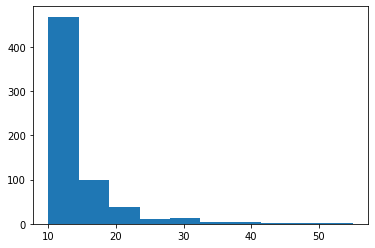

In [519]:
plt.hist(polG_edge_weights)

In [520]:
pol_maxsw = max(polG_edge_weights)
pol_maxsw

55

In [521]:
polG_edge_weights = [e[2]['weight']*4/pol_maxsw for e in polG.edges(data=True)]

(array([469., 100.,  38.,  12.,  14.,   3.,   3.,   2.,   1.,   1.]),
 array([0.72727273, 1.05454545, 1.38181818, 1.70909091, 2.03636364,
        2.36363636, 2.69090909, 3.01818182, 3.34545455, 3.67272727,
        4.        ]),
 <BarContainer object of 10 artists>)

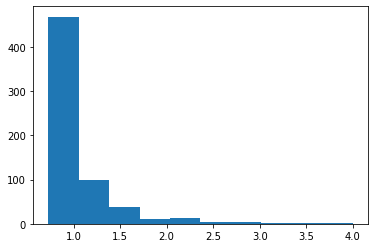

In [522]:
plt.hist(polG_edge_weights)

Let's look at the distribution of node degrees.

(array([44.,  9.,  8.,  9.,  8.,  3.,  0.,  0.,  2.,  1.]),
 array([ 1. ,  8.7, 16.4, 24.1, 31.8, 39.5, 47.2, 54.9, 62.6, 70.3, 78. ]),
 <BarContainer object of 10 artists>)

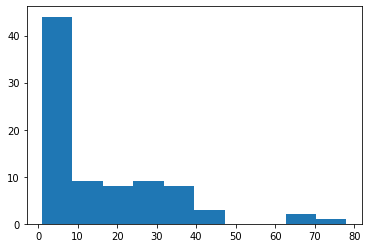

In [527]:
plt.hist(list(dict(polG.degree()).values()))

Let's label those nodes with > 60 degrees

In [540]:
g60 = [d for d in polG.nodes() if polG.degree(d) > 40]

In [541]:
g60

['washingtonexaminer.com',
 'newyorker.com',
 'foxnews.com',
 'express.co.uk',
 'vox.com',
 'msnbc.com']

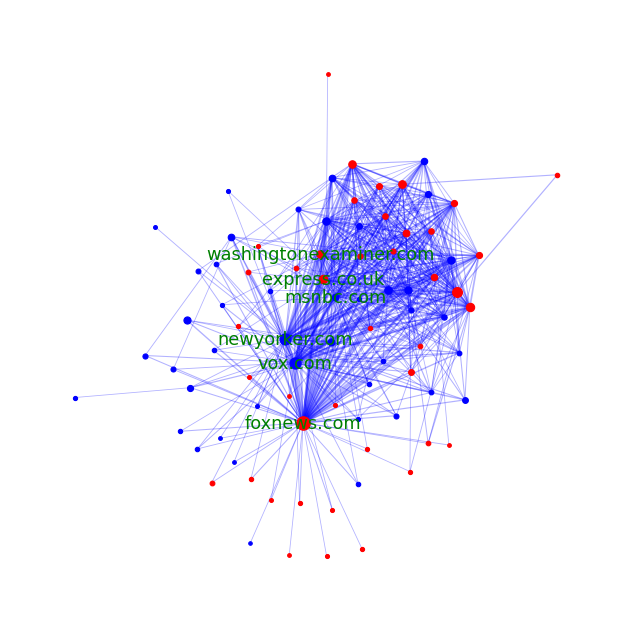

In [542]:
figure(figsize=(8, 8), dpi=80)

pos = nx.kamada_kawai_layout(polG) #, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
for nn in incl_most_pos:
    if nn in polG.nodes():
        nx.draw_networkx_nodes(polG, pos, nodelist = [nn],
                           node_size=node_sizes[nn],
                          node_color = "red")
    
for nn in incl_most_neg:
    if nn in polG.nodes():
        nx.draw_networkx_nodes(polG, pos, nodelist = [nn],
                           node_size=node_sizes[nn],
                          node_color = "blue")

nx.draw_networkx_edges(polG, pos, 
                       edgelist=polG.edges, 
                       # width=w['weight']*5/500,
                       width = polG_edge_weights,
                       alpha=0.3, edge_color="b")
#     ecount += 1

# labels
labels = dict()
for node in polG.nodes():
    if node in g60:
        #set the node name as the key and the label as its value 
        labels[node] = node
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_family="sans-serif", font_color='green')
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## Notes

There are multiple algo for vis layout, so try them out & specify

Co-occurrence as edge weight

Total number of news source occurence OR # of edges as weight of nodes 

Think about capturing the information we have in our graph

Network analysis! Take some time to learn networkx

Label propagation -> node level prediction in GNN

Send out poll to Casey and Sohie (reading period?, virtual?)

For the presentation:
1. Motivation: importance of news, etc like in essay for Schiff. 
    * explain terms
    * Formulate 1-3 research qs. Main: how can we characterize the online news ecosystem? what does it mean to have audience-based approach? etc. (link to stat like hypothesis testing like comparison between local/national, reliable/unreliable sharing rate difference, position in network). 
    * Related literature review, reddit usage, etc, to position myself compared to other researchers.
2. Data collection & exploratory.
3. Methods to answer RQs
4. (anticipated) Results so far
5. Plan for Spring (per month)
6. Ask for thoughts and feasibility, narrow down? broaden? try something else